In [3]:
import torch
import nn_solver_hybrid_approach as ha
import nn_solver_PINN_approach as pa
import matplotlib.pyplot as plt
import numpy as np
import math

Epoch 1
-------------------------------
loss: 1.558214  [    0/54636]
loss: 0.118974  [ 6400/54636]
loss: 0.063628  [12800/54636]
loss: 0.050315  [19200/54636]
loss: 0.020078  [25600/54636]
loss: 0.021194  [32000/54636]
loss: 0.020877  [38400/54636]
loss: 0.016267  [44800/54636]
loss: 0.017278  [51200/54636]
Epoch 2
-------------------------------
loss: 0.025530  [    0/54636]
loss: 0.039892  [ 6400/54636]
loss: 0.019296  [12800/54636]
loss: 0.026963  [19200/54636]
loss: 0.015862  [25600/54636]
loss: 0.029198  [32000/54636]
loss: 0.015681  [38400/54636]
loss: 0.012585  [44800/54636]
loss: 0.020406  [51200/54636]
Epoch 3
-------------------------------
loss: 0.019175  [    0/54636]
loss: 0.010420  [ 6400/54636]
loss: 0.012155  [12800/54636]
loss: 0.011010  [19200/54636]
loss: 0.011403  [25600/54636]
loss: 0.011809  [32000/54636]
loss: 0.004363  [38400/54636]
loss: 0.006242  [44800/54636]
loss: 0.005427  [51200/54636]
Epoch 4
-------------------------------
loss: 0.006920  [    0/54636]


/var/folders/mh/gbj7v0tx7cn3t6x4ypc457mr0000gn/T/ipykernel_68827/3082495195.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


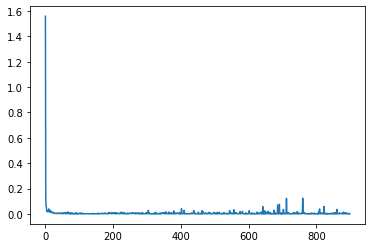

In [5]:
T4b = torch.load("./training_data/delta_rarified-AB_REMOVEDnum_pts-54636-delta-0.005-bumps-1000-tau-1000-h_param-0.2-w_param-0.025-deltat-0.001-datetime-2022-7-29-11-25.pt")
layer_array = [2,30,20,1]
model = pa.NeuralNetwork(layer_array)
lr = 1e-3
train_object = pa.PINNTrainingVarTrainData(NN= model, optimizer=torch.optim.Adam(model.parameters(), lr=lr), loss_fn = torch.nn.MSELoss(),epochs=100, alpha=10.0, training_data=T4b)
lossplot = train_object.train()

# stuff for error analysis: 
q_FEM = np.loadtxt('MaierStein_q_FEM.csv', delimiter=',', dtype=float)
pts = np.loadtxt('MaierStein_pts.csv', delimiter=',', dtype=float)
# work around the error of inputting numpy data into torch nn
pts_torch = torch.tensor(pts).float() 
q = model(pts_torch).detach().numpy().squeeze()

# print out the error stats: 
rmse = math.sqrt(np.sum((q-q_FEM)**2) / len(pts))
mae = np.sum(np.absolute(q - q_FEM)) / len(pts)
ma = np.amax(np.absolute(q - q_FEM))
print(f"rmse: {rmse}, mae: {mae}, ma: {ma}")

# view the loss plot: 
fig, ax = plt.subplots()
ax.plot(lossplot)
fig.show()


Epoch 1
-------------------------------
loss: 2.087597  [    0/54636]
loss: 0.218867  [ 6400/54636]
loss: 0.079177  [12800/54636]
loss: 0.030607  [19200/54636]
loss: 0.029339  [25600/54636]
loss: 0.022491  [32000/54636]
loss: 0.017186  [38400/54636]
loss: 0.044618  [44800/54636]
loss: 0.018302  [51200/54636]
Epoch 2
-------------------------------
loss: 0.021949  [    0/54636]
loss: 0.020752  [ 6400/54636]
loss: 0.023977  [12800/54636]
loss: 0.023436  [19200/54636]
loss: 0.030893  [25600/54636]
loss: 0.016593  [32000/54636]
loss: 0.016501  [38400/54636]
loss: 0.010660  [44800/54636]
loss: 0.022638  [51200/54636]
Epoch 3
-------------------------------
loss: 0.008188  [    0/54636]
loss: 0.030985  [ 6400/54636]
loss: 0.018198  [12800/54636]
loss: 0.023623  [19200/54636]
loss: 0.019121  [25600/54636]
loss: 0.018227  [32000/54636]
loss: 0.015441  [38400/54636]
loss: 0.020367  [44800/54636]
loss: 0.018586  [51200/54636]
Epoch 4
-------------------------------
loss: 0.009754  [    0/54636]


/var/folders/mh/gbj7v0tx7cn3t6x4ypc457mr0000gn/T/ipykernel_68827/3400418463.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


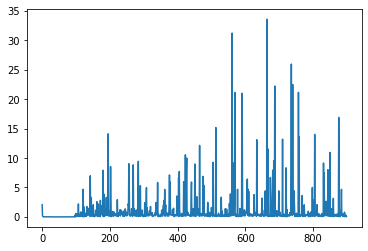

In [9]:
T = torch.load("./training_data/delta_rarified-AB_REMOVEDnum_pts-54636-delta-0.005-bumps-1000-tau-1000-h_param-0.2-w_param-0.025-deltat-0.001-datetime-2022-7-29-11-25.pt")
layer_array = [2,20,20,1]
model = pa.NeuralNetwork(layer_array)
lr = 1e-3
train_object = pa.PINNTrainingVarTrainData(NN= model, optimizer=torch.optim.Adam(model.parameters(), lr=lr), loss_fn = torch.nn.MSELoss(),epochs=100, alpha=10.0, training_data=T)
lossplot = train_object.train()

# stuff for error analysis: 
q_FEM = np.loadtxt('MaierStein_q_FEM.csv', delimiter=',', dtype=float)
pts = np.loadtxt('MaierStein_pts.csv', delimiter=',', dtype=float)
# work around the error of inputting numpy data into torch nn
pts_torch = torch.tensor(pts).float() 
q = model(pts_torch).detach().numpy().squeeze()

# print out the error stats: 
rmse = math.sqrt(np.sum((q-q_FEM)**2) / len(pts))
mae = np.sum(np.absolute(q - q_FEM)) / len(pts)
ma = np.amax(np.absolute(q - q_FEM))
print(f"rmse: {rmse}, mae: {mae}, ma: {ma}")

# view the loss plot: 
fig, ax = plt.subplots()
ax.plot(lossplot)
fig.show()